Data Aggregation
Problem Statement: Analyzing Sales Performance by Region in a Retail Company
Dataset: "Retail_Sales_Data.csv"
Description: The dataset contains information about sales transactions in a retail company. It 
includes attributes such as transaction date, product category, quantity sold, and sales 
amount. The goal is to perform data aggregation to analyze the sales performance by region 
and identify the top-performing regions.
Tasks to Perform:
1. Import the "Retail_Sales_Data.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Identify the relevant variables for aggregating sales data, such as region, sales 
amount, and product category.
4. Group the sales data by region and calculate the total sales amount for each region.
5. Create bar plots or pie charts to visualize the sales distribution by region.
6. Identify the top-performing regions based on the highest sales amount.
7. Group the sales data by region and product category to calculate the total sales 
amount for each combination.
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across 
different regions and product categories

In [2]:
import pandas as pd

# Step 2: Read the dataset
data = pd.read_csv("Retail_Sales_Data.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset, including data types and non-null values
print(data.info())

# Get summary statistics for numerical columns
print(data.describe())

# Get the names of columns in the dataset
print(data.columns)

# Check for missing values in the dataset
print(data.isnull().sum())


   Transaction_ID  Customer_ID State  Age Shop_Category  Sales Gender   
0               1         1234    MP   10       Grocery     10      M  \
1               2         1235    UP   21         Dairy     30      F   
2               3         1236    AP   23          Deli     23      F   
3               4         1237    RP   25          Meat     21      F   
4               5         1238    DP   27       Clothes     90      F   

   Items_in_basket  
0                2  
1                3  
2                4  
3                4  
4                3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales      

In [18]:
# Select the relevant columns for aggregation
relevant_columns = data[['State', 'Sales', 'Shop_Category']]
relevant_columns

# 'State' represents the region, 'Sales' represents sales amount, and 'Shop_Category' represents the product category


,State,Sales,Shop_Category
0,MP,10,Grocery
1,UP,30,Dairy
2,AP,23,Deli
3,RP,21,Meat
4,DP,90,Clothes
...,...,...,...
307,RP,349,Clothes
308,DP,369,Electronics
309,DP,389,Clothes
310,DP,409,Electronics


In [14]:
region_sales = data.groupby('State')['Sales'].sum().reset_index()
print(region_sales)

  State  Sales
0    AP  12176
1    DP  23346
2    KP  10887
3    MP   4916
4    RP  11049
5    UP   4072


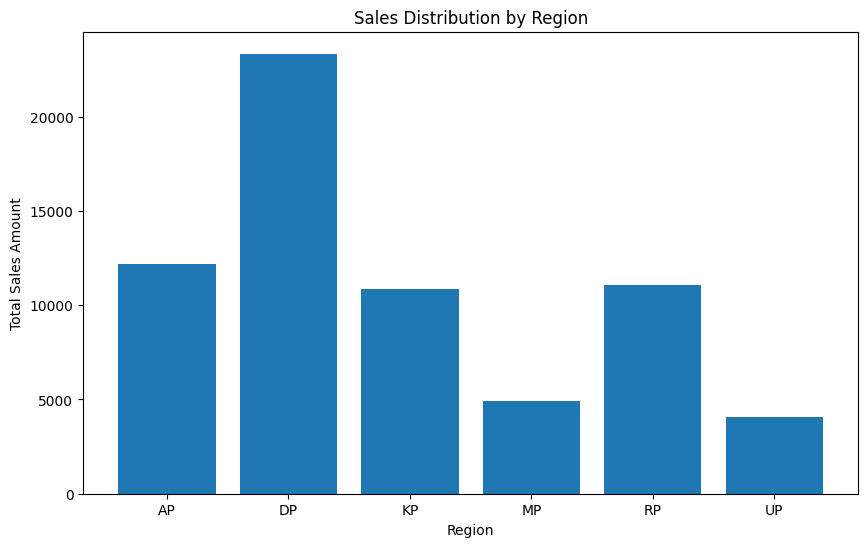

In [16]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the region_sales DataFrame as mentioned in a previous response

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_sales['State'], region_sales['Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.show()


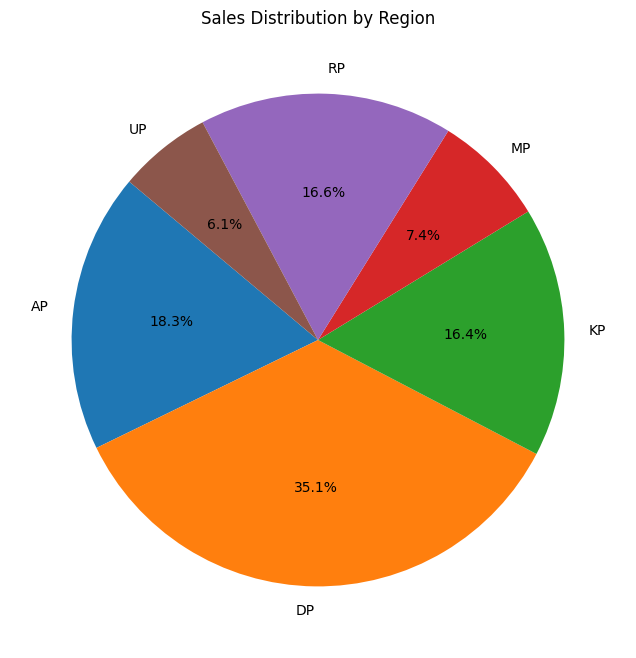

In [19]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['State'], autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Sales Distribution by Region')
plt.show()


In [8]:
# Sort the region_sales DataFrame in descending order by 'Sales' column
top_regions = region_sales.sort_values(by='Sales', ascending=False)

# Get the top-performing region
top_region = top_regions.iloc[0]

print("Top-Performing Region: ", top_region['State'])


Top-Performing Region:  DP


In [9]:
region_category_sales = data.groupby(['State', 'Shop_Category'])['Sales'].sum().reset_index()
print(region_category_sales)

   State Shop_Category  Sales
0     AP       Clothes   2127
1     AP         Dairy   1197
2     AP          Deli   1303
3     AP   Electronics   3818
4     AP       Grocery    823
5     AP          Meat   2908
6     DP       Clothes   7133
7     DP         Dairy   6027
8     DP          Deli   1723
9     DP   Electronics   4645
10    DP       Grocery   1736
11    DP          Meat   2082
12    KP       Clothes   3581
13    KP         Dairy    630
14    KP          Deli   2595
15    KP   Electronics   2742
16    KP       Grocery     54
17    KP          Meat   1285
18    MP       Clothes    711
19    MP          Deli   1144
20    MP   Electronics    696
21    MP       Grocery    950
22    MP          Meat   1415
23    RP       Clothes   2167
24    RP         Dairy     74
25    RP          Deli   1006
26    RP   Electronics   3087
27    RP       Grocery   2452
28    RP          Meat   2263
29    UP       Clothes   1077
30    UP         Dairy    816
31    UP          Deli     87
32    UP  

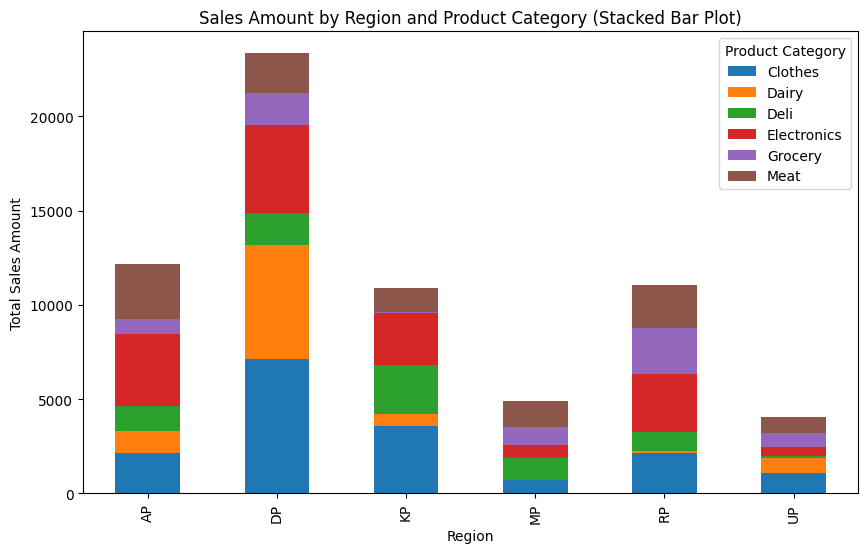

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the region_category_sales DataFrame as mentioned in a previous response

# Pivot the data to create a stacked bar plot
pivot_df = region_category_sales.pivot(index='State', columns='Shop_Category', values='Sales')

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category (Stacked Bar Plot)')
plt.legend(title='Product Category')
plt.show()


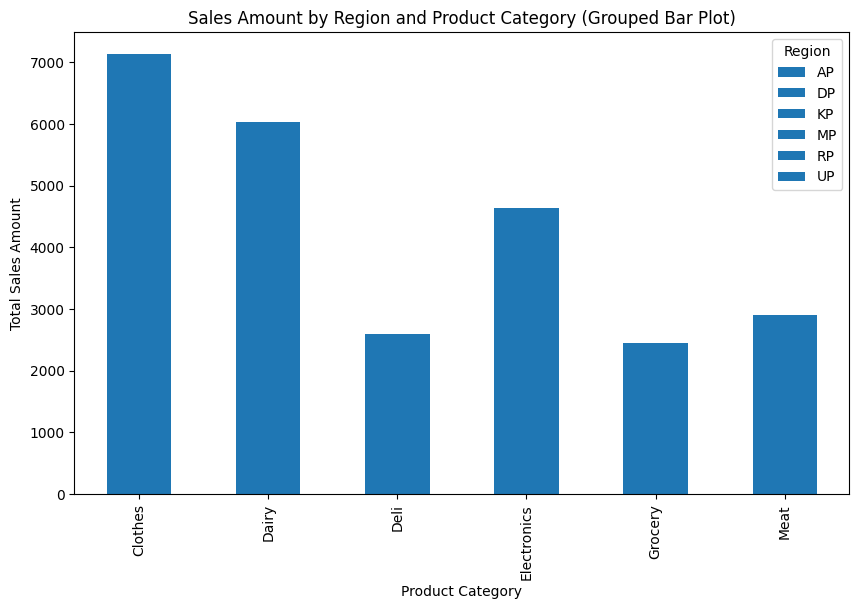

In [11]:
import matplotlib.pyplot as plt

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for region, group in region_category_sales.groupby('State'):
    group.plot(x='Shop_Category', y='Sales', kind='bar', ax=ax, label=region)

plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category (Grouped Bar Plot)')
plt.legend(title='Region')
plt.show()
